# Hobot Academy Contact Information

- **Website:** [Click here](https://hobotacademy.com)
- **Telegram Channel:** [Click here](https://t.me/hobotacademy)
- **YouTube:** [Click here](https://www.youtube.com/channel/UCfsmyuGvktcocxLa7HfBetA)
- **Instagram:** [Click here](https://www.instagram.com/hobot.academy)
- **All Social Media:** [Click here](https://zil.ink/hobot)


# Libraries

In [1]:
# pip install git+https://github.com/openai/CLIP.git

In [2]:
import torch
import clip
from PIL import Image
import matplotlib.pyplot as plt

# load the model and tokenizer from CLIP

In [3]:
device = "cuda" if torch.cuda.is_available else "cpu"
model, preprocessor = clip.load("ViT-B/32", device=device)

# Image Loading

In [4]:
image_path = '/content/drive/MyDrive/Hobot/photo-1.jpg'

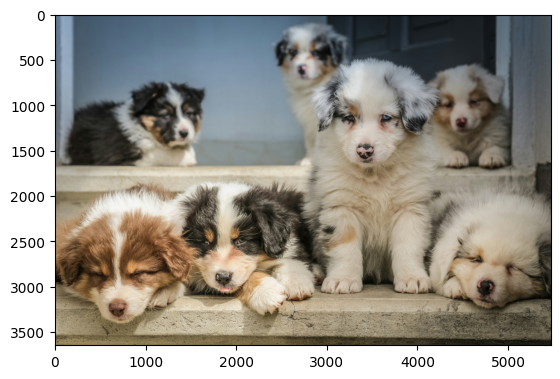

In [5]:
image = Image.open(image_path).convert("RGB")
plt.imshow(image)

In [6]:
org_img = image.copy()

In [7]:
image = preprocessor(image).unsqueeze(0).to(device)

# Label Tokenization

In [8]:
labels = [
    "a dog",
    "a cat",
    "a person",
    "a car",
    "a tree"
]

In [9]:
tokenized_lab = clip.tokenize(labels).to(device)

# Cosine Similarity Calculation

In [10]:
with torch.no_grad():
  image_feature = model.encode_image(image)
  text_feature = model.encode_text(tokenized_lab)

  image_feature /= image_feature.norm(dim=-1, keepdim=True)
  text_feature /= text_feature.norm(dim=-1, keepdim=True)

  similarity = (image_feature @ text_feature.T).squeeze(0)

  best_match_idx = similarity.argmax().item()
  best_label = labels[best_match_idx]

print(best_label)

a dog


# Display Result

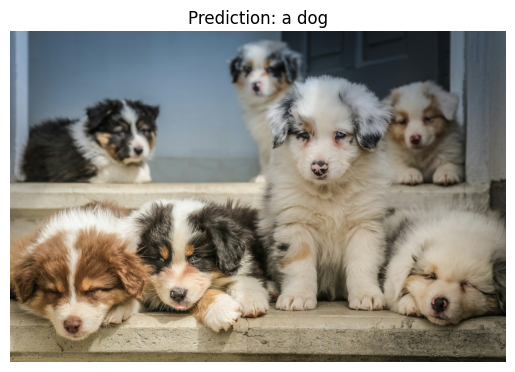

In [11]:
plt.imshow(org_img)
plt.title(f"Prediction: {best_label}")
plt.axis('off')
plt.show()